# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

Mengimport Library-libary yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import FactorAnalysis
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from scipy.stats.mstats import winsorize

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
path = '/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/Belajar Machine Learning Pemula/Dataset_clustering.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Raymond Ryan,39,Divorced,High School,3,Non-smoker,Sedentary,Employed,35061.68,Low,Unhealthy,Fair,No,No,Yes,No
1,Heather King,61,Widowed,High School,2,Non-smoker,Sedentary,Unemployed,26651.65,Moderate,Unhealthy,Fair,Yes,No,No,Yes
2,Ryan Chambers,29,Single,Associate Degree,0,Current,Sedentary,Employed,37534.30,Low,Unhealthy,Good,No,Yes,No,No
3,Riley Mata,22,Single,Bachelor's Degree,0,Former,Active,Employed,58159.44,Low,Healthy,Good,No,No,No,Yes
4,Monica Brown,21,Single,Bachelor's Degree,0,Former,Active,Unemployed,28167.44,High,Healthy,Fair,Yes,No,No,No


In [4]:
df.tail()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
41372,Joe White DDS,46,Married,Bachelor's Degree,0,Current,Moderate,Unemployed,8406.90,Moderate,Moderate,Poor,No,No,Yes,No
41373,Alice Hull,70,Married,Associate Degree,2,Former,Sedentary,Employed,63482.54,Moderate,Unhealthy,Poor,Yes,No,No,No
41374,Anthony Hickman,65,Widowed,Associate Degree,0,Non-smoker,Sedentary,Unemployed,11808.83,Moderate,Unhealthy,Poor,Yes,No,No,No
41375,Dana Watson,48,Married,Associate Degree,0,Former,Sedentary,Employed,48006.67,High,Moderate,Fair,Yes,No,No,Yes
41376,Pamela Reed,23,Single,Master's Degree,0,Non-smoker,Active,Employed,114207.25,Low,Healthy,Fair,No,No,No,No


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **4.1. Memahami Struktur Data**

In [5]:
print(df.shape)

(41377, 16)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41377 entries, 0 to 41376
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          41377 non-null  object 
 1   Age                           41377 non-null  int64  
 2   Marital Status                41377 non-null  object 
 3   Education Level               41377 non-null  object 
 4   Number of Children            41377 non-null  int64  
 5   Smoking Status                41377 non-null  object 
 6   Physical Activity Level       41377 non-null  object 
 7   Employment Status             41377 non-null  object 
 8   Income                        41377 non-null  float64
 9   Alcohol Consumption           41377 non-null  object 
 10  Dietary Habits                41377 non-null  object 
 11  Sleep Patterns                41377 non-null  object 
 12  History of Mental Illness     41377 non-null  object 
 13  H

### **4.2. Menangani Data yang Hilang**

In [7]:
df.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

### **4.3. Analisis Distribusi dan Korelasi**

In [8]:
print("Statistik Deskriptif:")
print(df.describe())

Statistik Deskriptif:
                Age  Number of Children         Income
count  41377.000000        41377.000000   41377.000000
mean      49.140368            1.297267   50674.936827
std       18.205325            1.234823   40336.838890
min       18.000000            0.000000       2.420000
25%       33.000000            0.000000   21280.730000
50%       49.000000            1.000000   37688.620000
75%       65.000000            2.000000   76570.830000
max       80.000000            4.000000  209894.250000


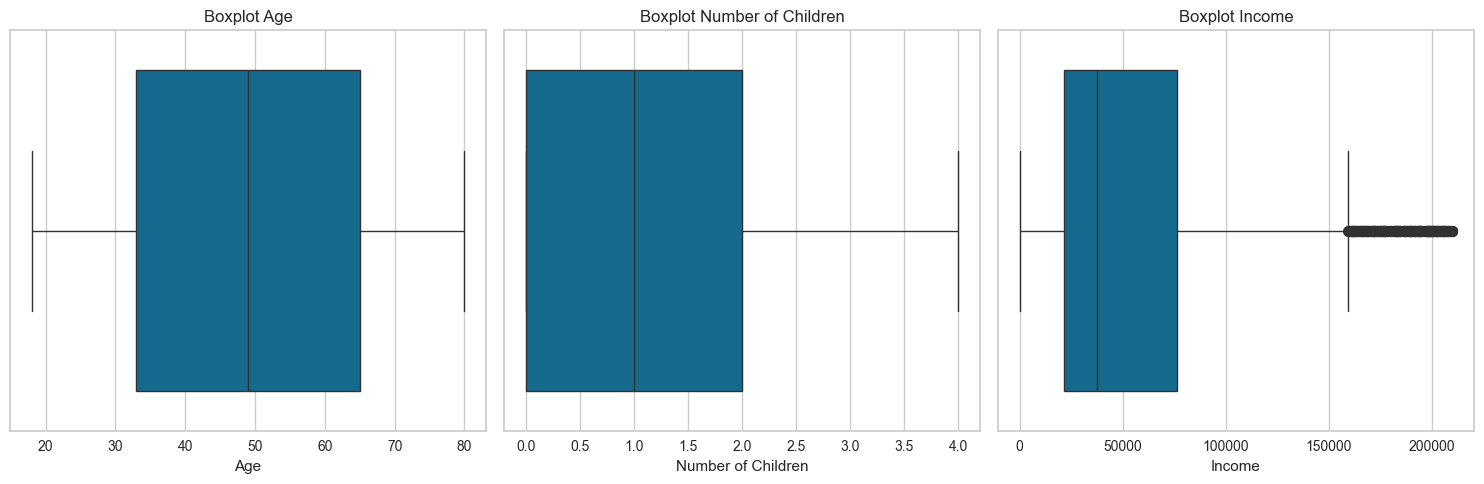

In [9]:
# Membuat satu figure dengan 3 subplot secara horizontal
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot untuk Age
sns.boxplot(x=df['Age'], ax=axes[0])
axes[0].set_title("Boxplot Age")

# Boxplot untuk Number of Children
sns.boxplot(x=df['Number of Children'], ax=axes[1])
axes[1].set_title("Boxplot Number of Children")

# Boxplot untuk Income
sns.boxplot(x=df['Income'], ax=axes[2])
axes[2].set_title("Boxplot Income")

# Menata layout agar tidak bertumpuk
plt.tight_layout()
plt.show()

### **4.4. Visualisasi Data**

Text(0, 0.5, 'Frekuensi')

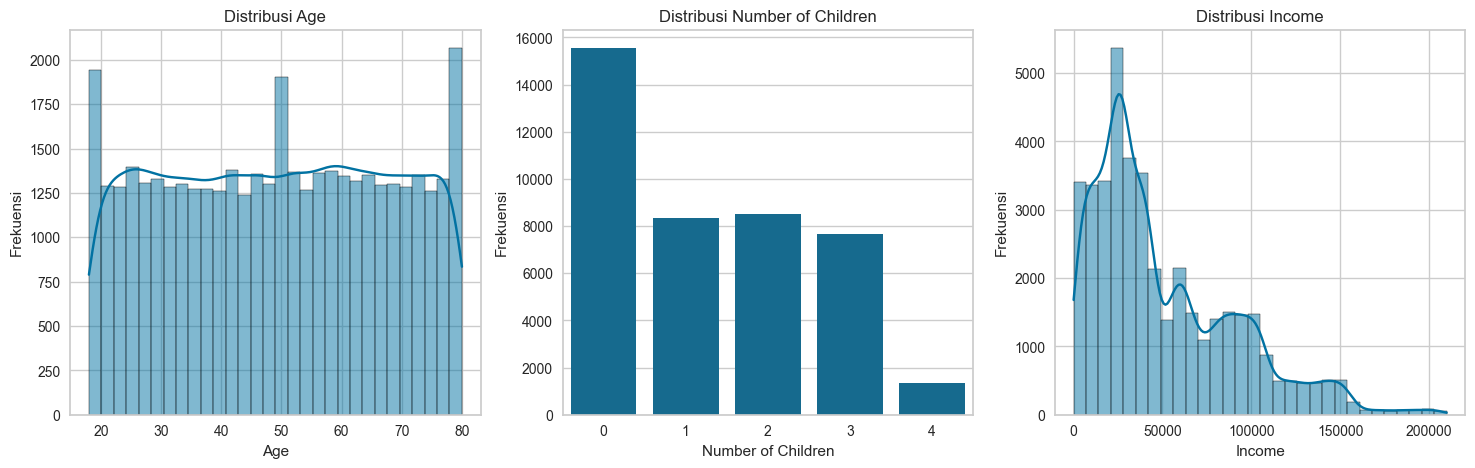

In [10]:
plt.figure(figsize=(18, 5))  # Perbesar agar cukup untuk 3 grafik

# Plot 1: Distribusi Age
plt.subplot(1, 3, 1)  # 1 baris, 3 kolom, posisi 1
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Distribusi Age")
plt.xlabel("Age")
plt.ylabel("Frekuensi")

# Plot 2: Distribusi Number of Children
plt.subplot(1, 3, 2)  # 1 baris, 3 kolom, posisi 2
sns.countplot(x="Number of Children", data=df)
plt.title("Distribusi Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Frekuensi")

# Plot 3: Distribusi Income (Gunakan histplot, bukan countplot)
plt.subplot(1, 3, 3)  # 1 baris, 3 kolom, posisi 3
sns.histplot(df['Income'].dropna(), bins=30, kde=True)
plt.title("Distribusi Income")
plt.xlabel("Income")
plt.ylabel("Frekuensi")

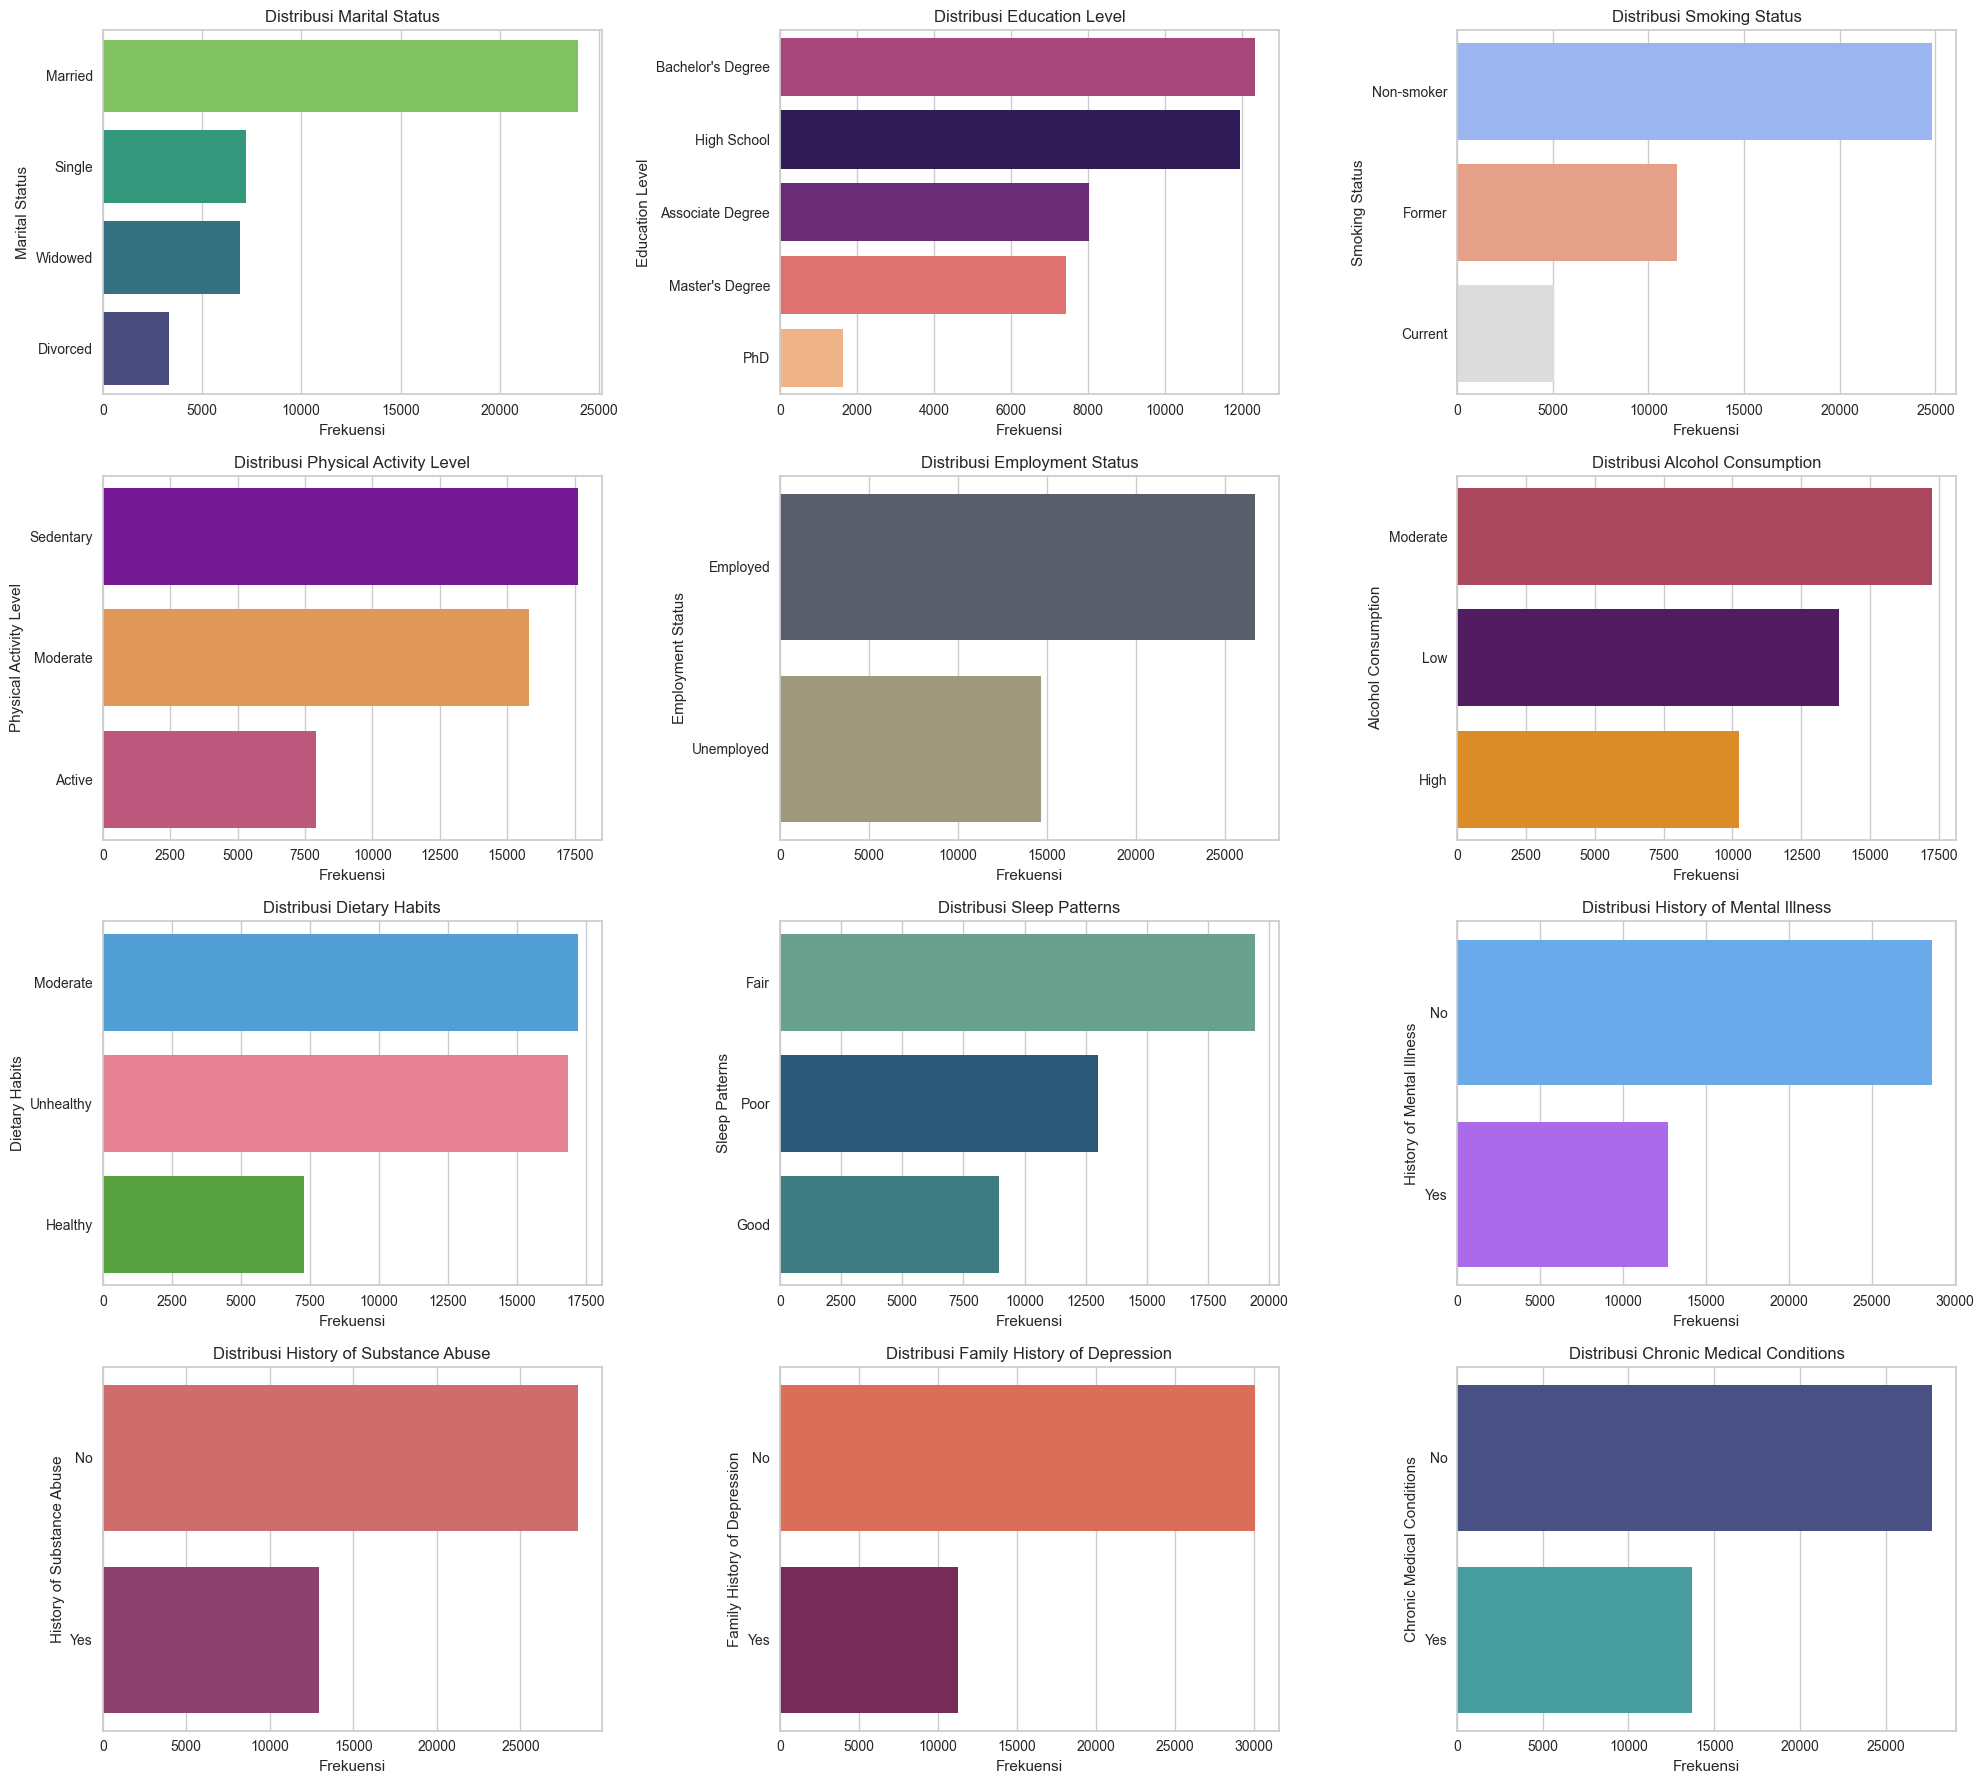

In [11]:
plt.figure(figsize=(20, 18))

# Daftar kolom dan palet warna
columns = [
    "Marital Status", "Education Level", "Smoking Status", 
    "Physical Activity Level", "Employment Status", "Alcohol Consumption",
    "Dietary Habits", "Sleep Patterns", "History of Mental Illness",
    "History of Substance Abuse", "Family History of Depression", "Chronic Medical Conditions"
]

palettes = [
    "viridis", "magma", "coolwarm", "plasma", "cividis", "inferno",
    "husl", "crest", "cool", "flare", "rocket", "mako"
]

# Loop untuk membuat subplot
for i, (col, palette) in enumerate(zip(columns, palettes), 1):
    plt.subplot(4, 3, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index, hue=df[col], palette=palette, legend=False)
    plt.title(f"Distribusi {col}")
    plt.xlabel("Frekuensi")
    plt.ylabel(col)

# Menata layout agar tidak bertumpuk
plt.tight_layout()
plt.show()


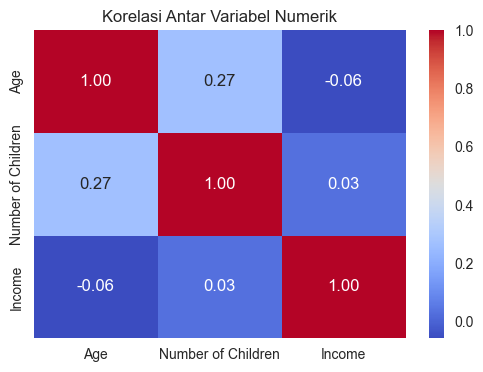

In [12]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

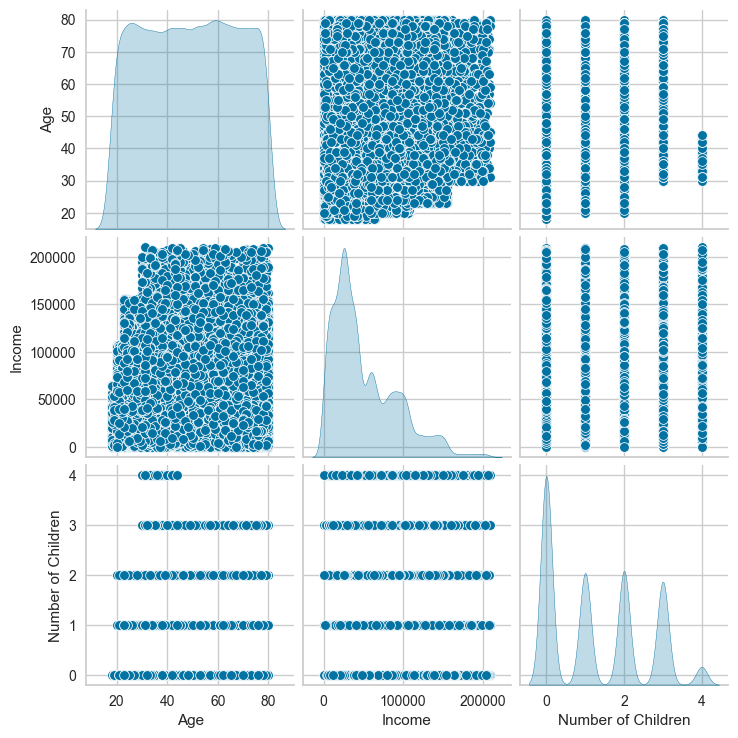

In [13]:
sns.pairplot(df[["Age", "Income", "Number of Children"]], diag_kind="kde")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### 5.1. Menghapus Kolom tidak relevan dengan Clustering

In [14]:
del df['Name']

### 5.2. Deteksi dan Penanganan Outlier

In [15]:
numeric_cols = df.select_dtypes(include=['number']).columns

outlierValues = {}

for col in numeric_cols:
    data = df[col].dropna().values
    q25 = np.percentile(data, 25)
    q75 = np.percentile(data, 75)
    iqr = q75 - q25
    lowerBound = q25 - 1.5 * iqr
    upperBound = q75 + 1.5 * iqr

    outliers = df[col][(df[col] < lowerBound) | (df[col] > upperBound)]
    outlierValues[col] = outliers

print("Jumlah Outlier per Kolom:")
for col, outliers in outlierValues.items():
    print(f"{col}: {len(outliers)} outlier")

Jumlah Outlier per Kolom:
Age: 0 outlier
Number of Children: 0 outlier
Income: 483 outlier


In [16]:
for col in numeric_cols:
    q25 = np.percentile(df[col].dropna(), 25)
    q75 = np.percentile(df[col].dropna(), 75)
    iqr = q75 - q25
    lowerBound = q25 - 1.5 * iqr
    upperBound = q75 + 1.5 * iqr
    
    df[col] = np.clip(df[col], lowerBound, upperBound)

    outliers = df[col][(df[col] < lowerBound) | (df[col] > upperBound)]
    outlierValues[col] = outliers

print("Jumlah Outlier per Kolom:")
for col, outliers in outlierValues.items():
    print(f"{col}: {len(outliers)} outlier")

Jumlah Outlier per Kolom:
Age: 0 outlier
Number of Children: 0 outlier
Income: 0 outlier


### 5.3. Standarisasi Fitur dengan StandardScaler

In [17]:
numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [18]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,-0.557007,Divorced,High School,1.378946,Non-smoker,Sedentary,Employed,-0.388708,Low,Unhealthy,Fair,No,No,Yes,No
1,0.651445,Widowed,High School,0.569103,Non-smoker,Sedentary,Unemployed,-0.602075,Moderate,Unhealthy,Fair,Yes,No,No,Yes
2,-1.106303,Single,Associate Degree,-1.050582,Current,Sedentary,Employed,-0.325976,Low,Unhealthy,Good,No,Yes,No,No
3,-1.490811,Single,Bachelor's Degree,-1.050582,Former,Active,Employed,0.197294,Low,Healthy,Good,No,No,No,Yes
4,-1.545741,Single,Bachelor's Degree,-1.050582,Former,Active,Unemployed,-0.563618,High,Healthy,Fair,Yes,No,No,No


### 5.4. Encoding Data Kategorikal dengan LabelEncoder

In [19]:
categorical_columns = df.select_dtypes(include=["object"]).columns

for col in categorical_columns:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} kategori unik")


Marital Status: 4 kategori unik
Education Level: 5 kategori unik
Smoking Status: 3 kategori unik
Physical Activity Level: 3 kategori unik
Employment Status: 2 kategori unik
Alcohol Consumption: 3 kategori unik
Dietary Habits: 3 kategori unik
Sleep Patterns: 3 kategori unik
History of Mental Illness: 2 kategori unik
History of Substance Abuse: 2 kategori unik
Family History of Depression: 2 kategori unik
Chronic Medical Conditions: 2 kategori unik


In [20]:
categorical_cols = [
    "Marital Status", "Education Level", "Smoking Status", "Physical Activity Level",
    "Employment Status", "Alcohol Consumption", "Dietary Habits", "Sleep Patterns",
    "History of Mental Illness", "History of Substance Abuse",
    "Family History of Depression", "Chronic Medical Conditions"
]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 
    label_encoders[col] = le  

In [21]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,-0.557007,0,2,1.378946,2,2,0,-0.388708,1,2,0,0,0,1,0
1,0.651445,3,2,0.569103,2,2,1,-0.602075,2,2,0,1,0,0,1
2,-1.106303,2,0,-1.050582,0,2,0,-0.325976,1,2,1,0,1,0,0
3,-1.490811,2,1,-1.050582,1,0,0,0.197294,1,0,1,0,0,0,1
4,-1.545741,2,1,-1.050582,1,0,1,-0.563618,0,0,0,1,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41377 entries, 0 to 41376
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           41377 non-null  float64
 1   Marital Status                41377 non-null  int64  
 2   Education Level               41377 non-null  int64  
 3   Number of Children            41377 non-null  float64
 4   Smoking Status                41377 non-null  int64  
 5   Physical Activity Level       41377 non-null  int64  
 6   Employment Status             41377 non-null  int64  
 7   Income                        41377 non-null  float64
 8   Alcohol Consumption           41377 non-null  int64  
 9   Dietary Habits                41377 non-null  int64  
 10  Sleep Patterns                41377 non-null  int64  
 11  History of Mental Illness     41377 non-null  int64  
 12  History of Substance Abuse    41377 non-null  int64  
 13  F

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [24]:
X = df.copy()

In [25]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
model_all = kmeans.fit_predict(X)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [26]:
score = silhouette_score(X, model_all)
print(f'K={k}, Silhouette Score: {score:.4f}')

K=4, Silhouette Score: 0.1263


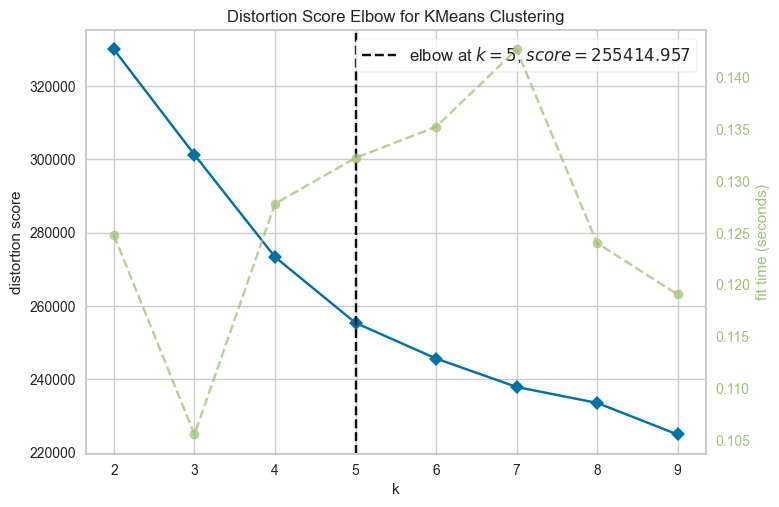

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X)
visualizer.show()

In [28]:
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    model_all = kmeans.fit_predict(X)
    score = silhouette_score(X, model_all)
    print(f'K={k}, Silhouette Score: {score:.4f}')

K=2, Silhouette Score: 0.1128
K=3, Silhouette Score: 0.1332
K=4, Silhouette Score: 0.1190
K=5, Silhouette Score: 0.1026
K=6, Silhouette Score: 0.1029
K=7, Silhouette Score: 0.1144
K=8, Silhouette Score: 0.1152
K=9, Silhouette Score: 0.1020


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [29]:
X_selected = df[["Employment Status", "Sleep Patterns", "History of Mental Illness", 
                  "Family History of Depression"]].values

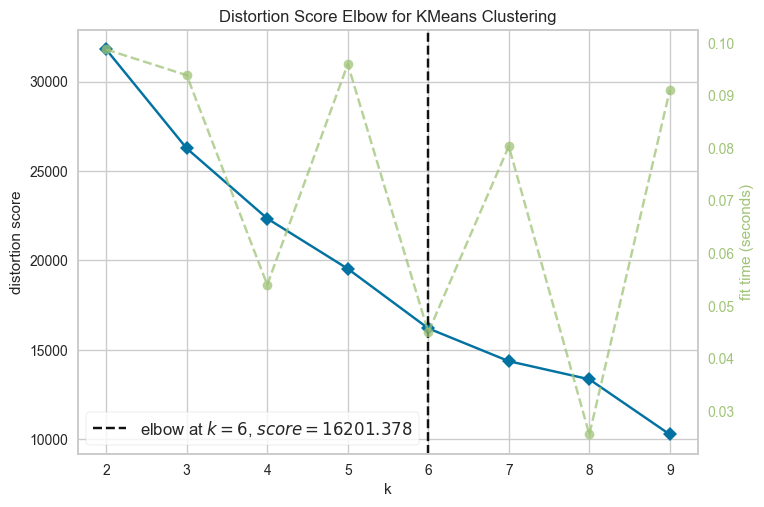

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X_selected)
visualizer.show()

In [31]:
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(X_selected)
    score = silhouette_score(X_selected, clusters)
    print(f'K={k}, Silhouette Score: {score:.4f}')

K=2, Silhouette Score: 0.4255
K=3, Silhouette Score: 0.3373
K=4, Silhouette Score: 0.3690
K=5, Silhouette Score: 0.4107
K=6, Silhouette Score: 0.3915
K=7, Silhouette Score: 0.4812
K=8, Silhouette Score: 0.5145
K=9, Silhouette Score: 0.6073


Principal Feature Analysis (PFA) untuk meningkatkan Silhouette Score

In [32]:
pfa = FactorAnalysis(n_components=2)
X_pfa = pfa.fit_transform(X_selected)

for k in range(2,10):
    kmeans_pfa = KMeans(n_clusters=k)
    clusters_pfa = kmeans_pfa.fit_predict(X_pfa)
    score_pfa = silhouette_score(X_pfa, clusters_pfa)
    print(f"K {k}, Silhouette Score setelah PFA: {score_pfa:.4f}")

K 2, Silhouette Score setelah PFA: 0.5904
K 3, Silhouette Score setelah PFA: 0.5983
K 4, Silhouette Score setelah PFA: 0.6237
K 5, Silhouette Score setelah PFA: 0.5964
K 6, Silhouette Score setelah PFA: 0.6657
K 7, Silhouette Score setelah PFA: 0.7123
K 8, Silhouette Score setelah PFA: 0.7386
K 9, Silhouette Score setelah PFA: 0.8037


#### Berikut Perbandingan Silhouette Score pada Model KMeans Sebelum dan Sesudah FS

| K  | Sebelum FS | Sesudah FS | Sesudah FS + PFA |
|----|------------|------------|------------------|
| 2  | 0.1128     | 0.4255     | 0.5904           |
| 3  | 0.1332     | 0.3373     | 0.5983           |
| 4  | 0.1190     | 0.3690     | 0.6237           |
| 5  | 0.1026     | 0.4107     | 0.5964           |
| 6  | 0.1029     | 0.3915     | 0.6657           |
| 7  | 0.1144     | 0.4812     | 0.7123           |
| 8  | 0.1152     | 0.5145     | 0.7386           |
| 9  | 0.1020     | 0.6073     | 0.8037           |


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

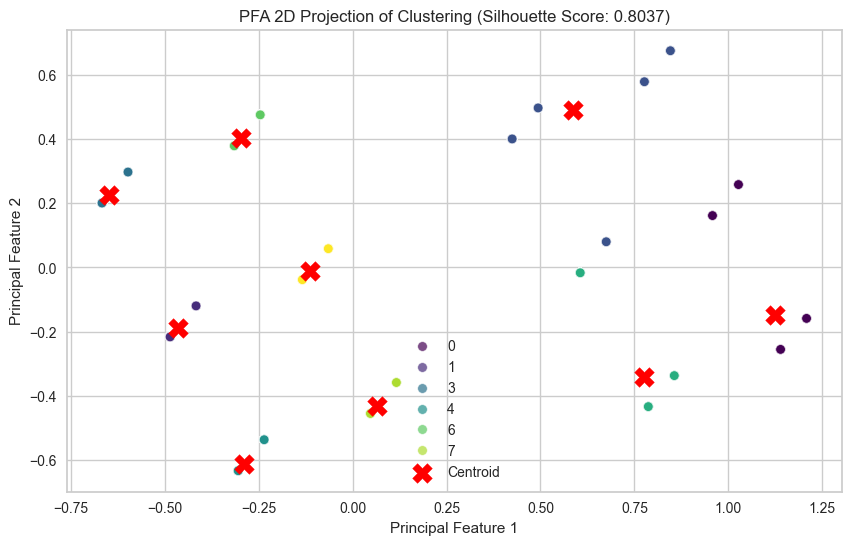

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pfa[:, 0], y=X_pfa[:, 1], hue=clusters_pfa, palette="viridis", alpha=0.7)

centroids_pfa = kmeans_pfa.cluster_centers_
plt.scatter(centroids_pfa[:, 0], centroids_pfa[:, 1], c='red', marker='X', s=200, label="Centroid")

plt.title(f"PFA 2D Projection of Clustering (Silhouette Score: {score_pfa:.4f})")
plt.xlabel("Principal Feature 1")
plt.ylabel("Principal Feature 2")
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [34]:
df_normalized = X.copy()
df_normalized['Cluster'] = kmeans_pfa.labels_

In [35]:
df_normalized.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Cluster
0,-0.557007,0,2,1.378946,2,2,0,-0.388708,1,2,0,0,0,1,0,3
1,0.651445,3,2,0.569103,2,2,1,-0.602075,2,2,0,1,0,0,1,2
2,-1.106303,2,0,-1.050582,0,2,0,-0.325976,1,2,1,0,1,0,0,1
3,-1.490811,2,1,-1.050582,1,0,0,0.197294,1,0,1,0,0,0,1,1
4,-1.545741,2,1,-1.050582,1,0,1,-0.563618,0,0,0,1,0,0,0,2


In [36]:
for col in categorical_cols:
    df_normalized[col] = label_encoders[col].inverse_transform(df_normalized[col])

In [37]:
df_normalized.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Cluster
0,-0.557007,Divorced,High School,1.378946,Non-smoker,Sedentary,Employed,-0.388708,Low,Unhealthy,Fair,No,No,Yes,No,3
1,0.651445,Widowed,High School,0.569103,Non-smoker,Sedentary,Unemployed,-0.602075,Moderate,Unhealthy,Fair,Yes,No,No,Yes,2
2,-1.106303,Single,Associate Degree,-1.050582,Current,Sedentary,Employed,-0.325976,Low,Unhealthy,Good,No,Yes,No,No,1
3,-1.490811,Single,Bachelor's Degree,-1.050582,Former,Active,Employed,0.197294,Low,Healthy,Good,No,No,No,Yes,1
4,-1.545741,Single,Bachelor's Degree,-1.050582,Former,Active,Unemployed,-0.563618,High,Healthy,Fair,Yes,No,No,No,2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [38]:
df_normalized[numeric_cols] = scaler.inverse_transform(df_normalized[numeric_cols])

In [39]:
df_normalized.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Cluster
0,39.0,Divorced,High School,3.0,Non-smoker,Sedentary,Employed,35061.68,Low,Unhealthy,Fair,No,No,Yes,No,3
1,61.0,Widowed,High School,2.0,Non-smoker,Sedentary,Unemployed,26651.65,Moderate,Unhealthy,Fair,Yes,No,No,Yes,2
2,29.0,Single,Associate Degree,0.0,Current,Sedentary,Employed,37534.30,Low,Unhealthy,Good,No,Yes,No,No,1
3,22.0,Single,Bachelor's Degree,0.0,Former,Active,Employed,58159.44,Low,Healthy,Good,No,No,No,Yes,1
4,21.0,Single,Bachelor's Degree,0.0,Former,Active,Unemployed,28167.44,High,Healthy,Fair,Yes,No,No,No,2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

### Agregasi pada fitur yang sudah diinversi berdasarkan klaster yang sudah didapat

In [ ]:
agg_categorical = df_normalized.groupby('Cluster')[["Employment Status", "Sleep Patterns", 
                                                   "History of Mental Illness", "Family History of Depression"]
                                                 ].agg(lambda x: x.mode().iloc[0])

print("Ringkasan Data Per Cluster:")
agg_categorical

Ringkasan Data Per Cluster:


,Employment Status,Sleep Patterns,History of Mental Illness,Family History of Depression
Cluster,,,,
0,Unemployed,Poor,Yes,No
1,Employed,Good,No,No
2,Unemployed,Fair,No,No
3,Employed,Fair,No,No
4,Employed,Poor,No,No
5,Unemployed,Poor,No,No
6,Employed,Fair,Yes,No
7,Employed,Poor,Yes,No
8,Employed,Good,Yes,No


### **Analisis Hasil Agregasi Model KMeans**

- **Klaster 0** didapatkan karena Employment Status memiliki nilai Unemployed, Sleep Patterns memiliki nilai Poor, History of Mental Illness memiliki nilai Yes, dan Family History of Depression memiliki nilai No.

- **Klaster 1** didapatkan karena Employment Status memiliki nilai Employed, Sleep Patterns memiliki nilai Good, History of Mental Illness memiliki nilai No, dan Family History of Depression memiliki nilai No.

- **Klaster 2** didapatkan karena Employment Status memiliki nilai Unemployed, Sleep Patterns memiliki nilai Fair, History of Mental Illness memiliki nilai No, dan Family History of Depression memiliki nilai No.

- **Klaster 3** didapatkan karena Employment Status memiliki nilai Employed, Sleep Patterns memiliki nilai Fair, History of Mental Illness memiliki nilai No, dan Family History of Depression memiliki nilai No.

- **Klaster 4** didapatkan karena Employment Status memiliki nilai Employed, Sleep Patterns memiliki nilai Poor, History of Mental Illness memiliki nilai No, dan Family History of Depression memiliki nilai No.

- **Klaster 5** didapatkan karena Employment Status memiliki nilai Unemployed, Sleep Patterns memiliki nilai Poor, History of Mental Illness memiliki nilai No, dan Family History of Depression memiliki nilai No.

- **Klaster 6** didapatkan karena Employment Status memiliki nilai Employed, Sleep Patterns memiliki nilai Fair, History of Mental Illness memiliki nilai Yes, dan Family History of Depression memiliki nilai No.

- **Klaster 7** didapatkan karena Employment Status memiliki nilai Employed, Sleep Patterns memiliki nilai Poor, History of Mental Illness memiliki nilai Yes, dan Family History of Depression memiliki nilai No.

- **Klaster 8** didapatkan karena Employment Status memiliki nilai Employed, Sleep Patterns memiliki nilai Good, History of Mental Illness memiliki nilai Yes, dan Family History of Depression memiliki nilai No.

### **Analisis Karakteristik Cluster dari Model KMeans**  

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan fitur **Employment Status, Sleep Patterns, History of Mental Illness, dan Family History of Depression**.  

### **Cluster 0 – Pengangguran dengan Pola Tidur Buruk dan Riwayat Penyakit Mental**  
- **Employment Status:** **Unemployed**  
- **Sleep Patterns:** **Poor**  
- **History of Mental Illness:** **Yes**  
- **Family History of Depression:** **No**  

**Analisis:**  
Kelompok ini terdiri dari individu yang **tidak memiliki pekerjaan**, memiliki **pola tidur yang buruk**, dan memiliki **riwayat penyakit mental**. Namun, mereka **tidak memiliki riwayat keluarga yang menderita depresi**. Pola ini bisa menunjukkan kelompok yang mengalami **tingkat stres tinggi atau ketidakstabilan emosional** akibat faktor sosial atau ekonomi.

### **Cluster 1 – Pekerja dengan Pola Tidur Baik dan Tanpa Riwayat Depresi**  
- **Employment Status:** **Employed**  
- **Sleep Patterns:** **Good**  
- **History of Mental Illness:** **No**  
- **Family History of Depression:** **No**  

**Analisis:**  
Kelompok ini terdiri dari individu yang **memiliki pekerjaan**, **pola tidur yang baik**, serta **tidak memiliki riwayat penyakit mental atau depresi dalam keluarga**. Mereka mungkin merupakan kelompok yang lebih stabil secara psikologis dan memiliki gaya hidup yang lebih sehat.

### **Cluster 2 – Pengangguran dengan Pola Tidur Sedang dan Tanpa Riwayat Depresi**  
- **Employment Status:** **Unemployed**  
- **Sleep Patterns:** **Fair**  
- **History of Mental Illness:** **No**  
- **Family History of Depression:** **No**  

**Analisis:**  
Individu dalam kelompok ini **tidak memiliki pekerjaan**, tetapi memiliki **pola tidur yang cukup baik** dan **tidak memiliki riwayat penyakit mental maupun keluarga dengan depresi**. Mereka bisa jadi merupakan kelompok yang sedang mencari pekerjaan atau berada dalam masa transisi dalam hidup mereka.

### **Cluster 3 – Pekerja dengan Pola Tidur Sedang dan Tanpa Riwayat Depresi**  
- **Employment Status:** **Employed**  
- **Sleep Patterns:** **Fair**  
- **History of Mental Illness:** **No**  
- **Family History of Depression:** **No**  

**Analisis:**  
Kelompok ini terdiri dari individu yang memiliki pekerjaan dan pola tidur yang cukup baik. Mereka juga tidak memiliki riwayat penyakit mental atau keluarga yang mengalami depresi, yang menunjukkan bahwa mereka cenderung lebih **stabil secara ekonomi dan mental**.

### **Cluster 4 – Pekerja dengan Pola Tidur Buruk dan Tanpa Riwayat Depresi**  
- **Employment Status:** **Employed**  
- **Sleep Patterns:** **Poor**  
- **History of Mental Illness:** **No**  
- **Family History of Depression:** **No**  

**Analisis:**  
Individu dalam cluster ini memiliki pekerjaan, tetapi mengalami **pola tidur yang buruk**. Ini bisa menjadi indikasi bahwa mereka **bekerja dengan tekanan tinggi atau memiliki jadwal kerja yang tidak teratur**, sehingga berdampak pada kualitas tidur mereka.

### **Cluster 5 – Pengangguran dengan Pola Tidur Buruk dan Tanpa Riwayat Depresi**  
- **Employment Status:** **Unemployed**  
- **Sleep Patterns:** **Poor**  
- **History of Mental Illness:** **No**  
- **Family History of Depression:** **No**  

**Analisis:**  
Kelompok ini terdiri dari individu yang **tidak memiliki pekerjaan dan memiliki pola tidur yang buruk**, tetapi tidak memiliki riwayat penyakit mental atau depresi dalam keluarga. Meskipun demikian, mereka mungkin memiliki risiko lebih tinggi mengalami gangguan psikologis karena kombinasi antara **pengangguran dan pola tidur yang tidak sehat**.

### **Cluster 6 – Pekerja dengan Pola Tidur Sedang dan Riwayat Penyakit Mental**  
- **Employment Status:** **Employed**  
- **Sleep Patterns:** **Fair**  
- **History of Mental Illness:** **Yes**  
- **Family History of Depression:** **No**  

**Analisis:**  
Kelompok ini terdiri dari individu yang memiliki pekerjaan dan pola tidur yang cukup baik, tetapi memiliki **riwayat penyakit mental**. Ini bisa menunjukkan bahwa mereka mungkin sedang **berusaha menjaga keseimbangan antara pekerjaan dan kesehatan mental**.

### **Cluster 7 – Pekerja dengan Pola Tidur Buruk dan Riwayat Penyakit Mental**  
- **Employment Status:** **Employed**  
- **Sleep Patterns:** **Poor**  
- **History of Mental Illness:** **Yes**  
- **Family History of Depression:** **No**  

**Analisis:**  
Individu dalam kelompok ini memiliki pekerjaan tetapi mengalami **pola tidur yang buruk** dan memiliki **riwayat penyakit mental**. Ini bisa mengindikasikan bahwa mereka mengalami **tekanan kerja tinggi atau stres**, yang berdampak pada kesehatan mental dan kualitas tidur mereka.

### **Cluster 8 – Pekerja dengan Pola Tidur Baik dan Riwayat Penyakit Mental**  
- **Employment Status:** **Employed**  
- **Sleep Patterns:** **Good**  
- **History of Mental Illness:** **Yes**  
- **Family History of Depression:** **No**  

**Analisis:**  
Kelompok ini terdiri dari individu yang memiliki pekerjaan, memiliki **pola tidur yang baik**, tetapi memiliki **riwayat penyakit mental**. Ini bisa menunjukkan bahwa mereka **mampu mengelola kesehatan mental mereka dengan baik**, meskipun pernah mengalami gangguan mental sebelumnya.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [40]:
df_normalized.to_csv('Dataset_Inisiasi.csv', index=False)